## Covid-19 Predection

In [1]:
import pandas as pd

In [2]:
covid=pd.read_csv("C:\\Users\\admin\\Desktop\\M.Tech sem2\\New folder\\Covid_Surviver2.csv")

In [3]:
covid.head(5)

,Gender,Age,Age_Group,Month_Infection,Weather,LockDown,ICU,Locality,Financial,Covid Stage,Immune,Other_Disease,Survived
0,1,78,1,12,1,0,1,1,1,1,2,1,0
1,1,47,2,5,0,1,1,2,3,1,99,99,1
2,1,60,1,6,0,1,0,2,2,1,99,99,0
3,0,50,2,6,0,1,1,2,2,1,99,99,1
4,0,26,2,6,0,1,1,1,2,1,99,99,1


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6683 entries, 0 to 6682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           6683 non-null   int64
 1   Age              6683 non-null   int64
 2   Age_Group        6683 non-null   int64
 3   Month_Infection  6683 non-null   int64
 4   Weather          6683 non-null   int64
 5   LockDown         6683 non-null   int64
 6   ICU              6683 non-null   int64
 7   Locality         6683 non-null   int64
 8   Financial        6683 non-null   int64
 9   Covid Stage      6683 non-null   int64
 10  Immune           6683 non-null   int64
 11  Other_Disease    6683 non-null   int64
 12  Survived         6683 non-null   int64
dtypes: int64(13)
memory usage: 678.8 KB


In [5]:
covid['Gender'].value_counts()

0    3841
1    2842
Name: Gender, dtype: int64

In [6]:
covid['Age'].value_counts()

60     312
63     247
65     220
61     213
62     208
      ... 
120      2
1        2
109      2
94       2
103      1
Name: Age, Length: 94, dtype: int64

In [7]:
covid['Age_Group'].value_counts()

1    3410
2    3051
3     222
Name: Age_Group, dtype: int64

In [8]:
covid['Month_Infection'].value_counts()

4     1807
5     1362
11     546
6      532
12     494
1      459
10     325
2      292
9      276
3      235
8      197
7      158
Name: Month_Infection, dtype: int64

In [9]:
covid['Weather'].value_counts()

0    4338
1    2345
Name: Weather, dtype: int64

In [10]:
covid['LockDown'].value_counts()

1    3739
0    2944
Name: LockDown, dtype: int64

In [11]:
covid['ICU'].value_counts()

1    3671
0    3012
Name: ICU, dtype: int64

In [12]:
covid['Locality'].value_counts()

2     4242
1     2263
3      177
99       1
Name: Locality, dtype: int64

In [13]:
covid['Financial'].value_counts()

2     4647
1     1748
3      287
99       1
Name: Financial, dtype: int64

In [14]:
covid['Covid Stage'].value_counts()

1    6683
Name: Covid Stage, dtype: int64

In [15]:
covid['Immune'].value_counts()

99    3549
2     1684
1     1450
Name: Immune, dtype: int64

In [16]:
covid['Other_Disease'].value_counts()

99    4873
1     1708
0      102
Name: Other_Disease, dtype: int64

In [17]:
covid.describe()

,Gender,Age,Age_Group,Month_Infection,Weather,LockDown,ICU,Locality,Financial,Covid Stage,Immune,Other_Disease,Survived
count,6683.000000,6683.000000,6683.000000,6683.000000,6683.000000,6683.000000,6683.000000,6683.000000,6683.000000,6683.0,6683.000000,6683.000000,6683.000000
mean,0.425258,55.831064,1.522969,5.884782,0.350890,0.559479,0.549304,1.702379,1.795900,1.0,53.294778,72.442765,0.611552
std,0.494419,17.025687,0.562100,3.162450,0.477284,0.496487,0.497600,1.297952,1.292671,0.0,48.642123,43.578865,2.991547
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000
25%,0.000000,44.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,2.000000,1.000000,0.000000
50%,0.000000,60.000000,1.000000,5.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.0,99.000000,99.000000,1.000000
75%,1.000000,67.000000,2.000000,8.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.0,99.000000,99.000000,1.000000
max,1.000000,120.000000,3.000000,12.000000,1.000000,1.000000,1.000000,99.000000,99.000000,1.0,99.000000,99.000000,99.000000


In [18]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A9A0FD0>,
      dtype=object)

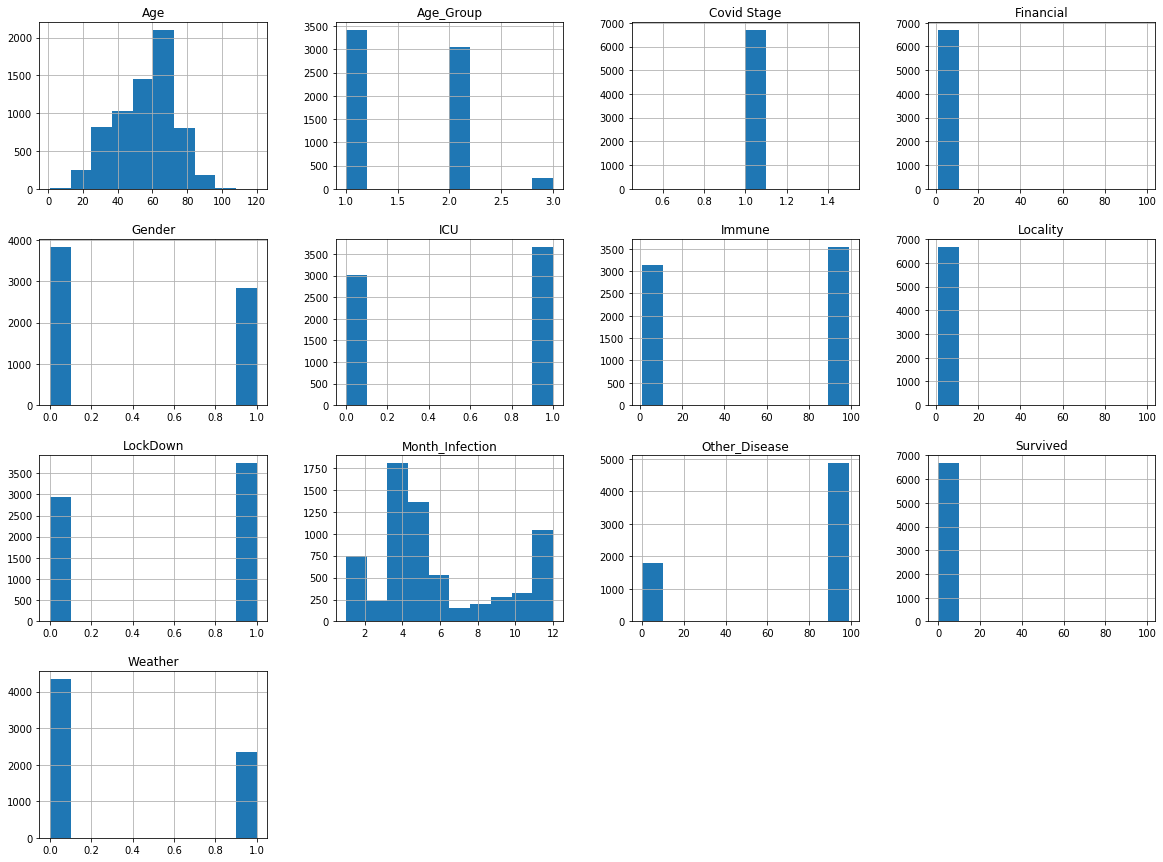

In [19]:
covid.hist(figsize=(20,15))

## train test split

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(covid,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\n Rows in test_set:{len(test_set)}\n")

Rows in train set:5346
 Rows in test_set:1337



In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(covid,covid['Other_Disease']):
    start_train_set=covid.loc[train_index]
    start_test_set=covid.loc[test_index]

In [22]:
start_test_set.describe()

,Gender,Age,Age_Group,Month_Infection,Weather,LockDown,ICU,Locality,Financial,Covid Stage,Immune,Other_Disease,Survived
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.0,1337.000000,1337.000000,1337.000000
mean,0.432311,55.940165,1.507853,6.020942,0.363500,0.543007,0.543755,1.686612,1.773373,1.0,55.112939,72.451010,0.672401
std,0.495582,16.664019,0.556782,3.252522,0.481187,0.498333,0.498268,0.520314,0.507675,0.0,48.512622,43.587316,3.839843
min,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000
25%,0.000000,44.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,2.000000,1.000000,0.000000
50%,0.000000,60.000000,1.000000,5.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.0,99.000000,99.000000,1.000000
75%,1.000000,67.000000,2.000000,9.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.0,99.000000,99.000000,1.000000
max,1.000000,102.000000,3.000000,12.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.0,99.000000,99.000000,99.000000


## loking for corelation

In [23]:
corr_matrix=covid.corr()

In [24]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived           1.000000
ICU                0.037097
LockDown           0.029967
Other_Disease      0.026279
Age_Group          0.022127
Financial          0.009371
Locality           0.002250
Gender             0.002122
Month_Infection   -0.011977
Age               -0.014517
Immune            -0.015683
Weather           -0.033759
Covid Stage             NaN
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A98A0D0>,
      dtype=object)

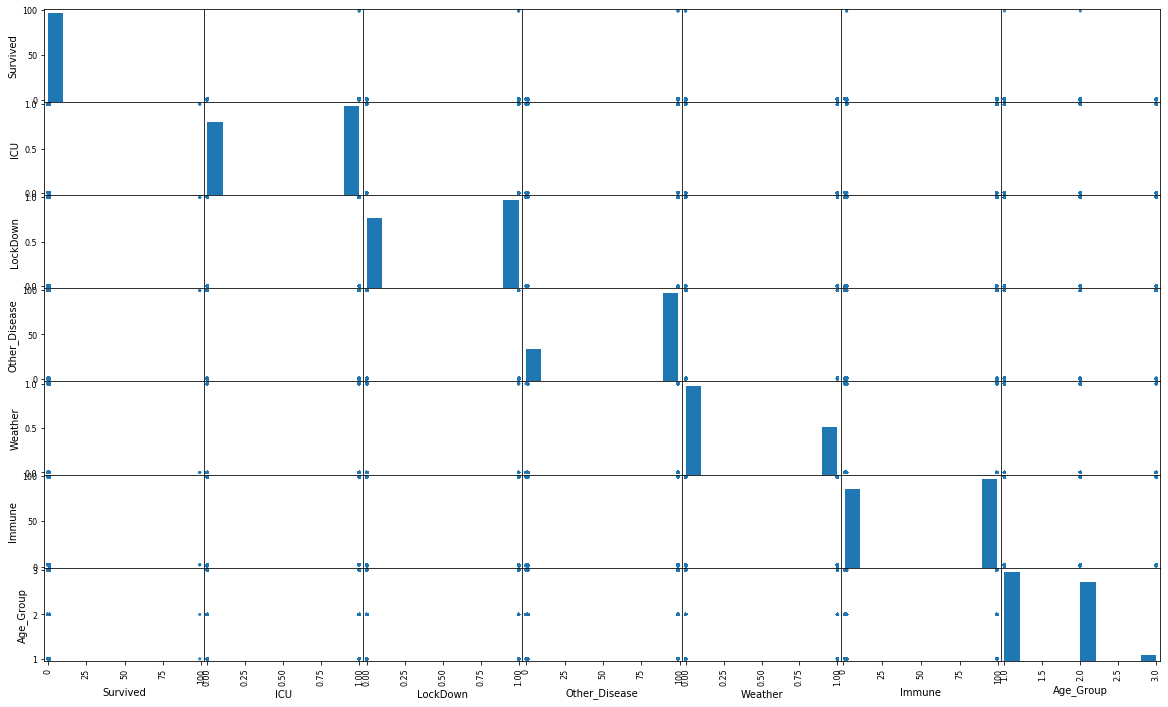

In [27]:
from pandas.plotting import scatter_matrix
atrb = ["Survived","ICU","LockDown","Other_Disease","Weather","Immune","Age_Group"]
scatter_matrix(covid[atrb],figsize=(20,12))

#visualising the Training set results


X_set, y_set = X_test, y_test


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min()- 1 ,

                               stop = X_set[:, 0].max() + 1,

                               step = 0.01),

                     np.arange(start = X_set[:, 1].min() -1,

                               stop = X_set[:, 0].max() + 1,

                               step = 0.01))



Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape(X1.shape), 
                                    alpha=0.75,
                                    cmap=ListedColormap(
                                    ('yellow', 'white')))
plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())




for i,j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set== j, 0], X_set[y_set == j, 1],
 c =  ListedColormap(('green', 'red', 'blue'))(i), label = j)

             

plt.title('PCA (Training set)')

plt.xlabel('PC1')

plt.ylabel('PC2')

plt.legend()

plt.show()

#split into dependant and independent variable
x = co.iloc[:,0:2].values

y = co.iloc[:,28].values



#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# explained_variane = pca.explained_variance_ratio_



#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)



#predicting results



y_pred = classifier.predict(X_test)

print("accuracy \score:", accuracy_score(y_test,y_pred))

#visualising the Training set results



X_set, y_set = X_test, y_test



X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min(),
                               stop=X_set[:, 0].max(), step=0.1),
                     np.arange(start=X_set[:, 1].min(),
                               stop=X_set[:,1].max(), step=0.1))

Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape((X1.shape[0],X2.shape[0]), 
                                    alpha=0.75,
                                    cmap=ListedColormap(
                                    ('white','yellow'))))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())



for i,j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set== j, 0], X_set[y_set == j, 1],
 c =  ListedColormap(('green', 'red', 'blue'))(i), label = j)

             

plt.title('PCA using Logistic Regression (Training set)')

plt.xlabel('Female')

plt.ylabel('Male')

plt.legend()

plt.show()

#split into dependant and independent variable
x = co.iloc[:,2:6].values

y = co.iloc[:,28].values



#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# explained_variane = pca.explained_variance_ratio_



#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)



#predicting results



y_pred = classifier.predict(X_test)

print("accuracy \score:", accuracy_score(y_test,y_pred))

#visualising the Training set results



X_set, y_set = X_test, y_test


    X1, X2= np.meshgrid(np.arange(start=X_set[:, 0].min(),
                               stop=X_set[:, 0].max(), step=0.5),
                             np.arange(start=X_set[:, 1].min(),
                               stop=X_set[:, 1].max(), step=0.5))
                            

Z_train = np.array([ X1.ravel(),X2.ravel()]+ [np.repeat(0, X1.ravel().size) for _ in range(26)]).T
plt.contourf( X1, X2, classifier.predict(Z_train).reshape(X1.shape[0],X2.shape[0]), 
                                    alpha=0.75,
                                    cmap=ListedColormap(
                                    ('yellow', 'white','')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())



for i,j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set== j, 0], X_set[y_set == j, 1],
 c =  ListedColormap(('green', 'red', 'blue'))(i), label = j)

             

plt.title('PCA using Logistic Regression (Training set)')

plt.xlabel('Female')

plt.ylabel('Male')

plt.legend()

plt.show()

#split into dependant and independent variable
x = co.iloc[:,6:22].values

y = co.iloc[:,28].values



#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# explained_variane = pca.explained_variance_ratio_



#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)



#predicting results



y_pred = classifier.predict(X_test)

print("accuracy \score:", accuracy_score(y_test,y_pred))

#split into dependant and independent variable
x = co.iloc[:,26:28].values

y = co.iloc[:,28].values



#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

print("x_dependent variables = " +str(x))
print("y_independent variables = " +str(y))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# explained_variane = pca.explained_variance_ratio_



#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)



#predicting results



y_pred = classifier.predict(X_test)

print("accuracy \score:", accuracy_score(y_test,y_pred))

#visualising the Training set results



X_set, y_set = X_test, y_test



X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min(),
                               stop=X_set[:, 0].max(), step=0.5),
                     np.arange(start=X_set[:, 0].min(),
                               stop=X_set[:,0].max(), step=0.5))

Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape(X1.shape[0],X2.shape[0]), 
                                    alpha=0.75,
                                    cmap=ListedColormap(
                                    ('yellow', 'white')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())



for i,j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set== j, 0], X_set[y_set == j, 1],
 c =  ListedColormap(('green', 'red', 'blue'))(i), label = j)

             

plt.title('PCA using Logistic Regression (Training set)')

plt.xlabel('Other Desies')

plt.ylabel('Immunity')

plt.legend()

plt.show()

#split into dependant and independent variable
x = co.iloc[:,23:25].values

y = co.iloc[:,28].values



#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

print("x_dependent variables = " +str(x))
print("y_independent variables = " +str(y))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# explained_variane = pca.explained_variance_ratio_



#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)



#predicting results



y_pred = classifier.predict(X_test)

print("accuracy \score:", accuracy_score(y_test,y_pred))

#visualising the Training set results



X_set, y_set = x_test, y_test



X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()- 1 ,

                               stop = X_set[:, 0].max() + 1,

                               step = 0.1),

                     np.arange(start = X_set[:, 1].min() -1,

                               stop = X_set[:, 1].max() + 1,

                               step = 0.1))


Z_train = np.array([X1.ravel(), X2.ravel()]).T
pred=classifier.predict(Z_train).reshape(X1.shape)
plt.contourf(( X1, X2, pred, alpha = 0.5, Cmap = ListedColormap(('red', 'green'))))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())



for i,j in enumerate(np.unique(y_set)):

    plt. scatter(X_set[y_set== j, 0], X_set[y_set == j, 1],

 c =  ListedColormap(('red', 'green', 'blue'))(i), label = j)

             

plt.title('PCA using Logistic Regression (Training set)')

plt.xlabel('PC1')

plt.ylabel('PC2')

plt.legend()

plt.show()
